In [ ]:
# prompt: data science imports, default style sns, mount drive

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set default Seaborn style
sns.set()

# Mount Google Drive (only necessary in Google Colab)
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#replace with your path
path = '/content/drive/My Drive/Colab Notebooks/dso574/AirBnB/'
airbnb = pd.read_csv(path + 'Combined Listing Data [Summary].csv', index_col=0, low_memory=False)
airbnb['year'] = airbnb['Scrape File'].apply(lambda x: int(x[12:16]))
airbnb['month'] = airbnb['Scrape File'].apply(lambda x: int(x[17:19]))
airbnb = airbnb.drop('neighbourhood_group', axis=1)

In [ ]:
airbnb.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Scrape File,year,month
0,3861476,venicelocalliving.com 341,16577861,John,Venice,33.998202,-118.476196,Entire home/apt,145,1,4,2015-05-08,0.4,10,304.0,los_angeles_2015_05_listings.csv,2015,5
1,6431889,Turquoise Jewel at Venice Beach,18993265,Greg,Venice,33.985100,-118.469738,Entire home/apt,175,1,0,NaN,NaN,1,76.0,los_angeles_2015_05_listings.csv,2015,5
2,5754633,Terrane Resort - Oceanfront Suite,15241342,Monica,Rancho Palos Verdes,33.740152,-118.395754,Private room,295,2,0,NaN,NaN,2,310.0,los_angeles_2015_05_listings.csv,2015,5
3,6302541,Hollywood Hot Spot,32776680,Alix,Hollywood,34.099955,-118.311584,Private room,110,1,0,NaN,NaN,1,362.0,los_angeles_2015_05_listings.csv,2015,5
4,4469657,Main Street Retreat,10658835,Brandon,Venice,33.997269,-118.478744,Entire home/apt,600,7,0,NaN,NaN,11,328.0,los_angeles_2015_05_listings.csv,2015,5


In [ ]:
airbnb['date'] = pd.to_datetime(airbnb.apply(lambda x: str(x.month) + '-' + str(x.year), axis=1))

<ipython-input-30-8ebda9c1015c>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  airbnb['date'] = pd.to_datetime(airbnb.apply(lambda x: str(x.month) + '-' + str(x.year), axis=1))


In [ ]:
airbnb.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,year
count,1.633610e+06,1.633610e+06,1.633610e+06,1.633610e+06,1.633610e+06,1.633610e+06,1.633610e+06,1.289655e+06,1.633610e+06,1.633596e+06,1.633610e+06
mean,1.906284e+07,6.927162e+07,3.405247e+01,-1.183256e+02,2.055045e+02,7.728674e+00,2.916071e+01,1.795509e+00,6.309192e+00,1.778052e+02,2.018606e+03
std,1.178250e+07,7.870577e+07,1.176273e-01,2.554095e-01,5.438252e+02,2.258822e+01,5.479692e+01,1.935981e+00,1.741204e+01,1.403918e+02,1.343315e+00
min,1.090000e+02,4.200000e+01,3.333848e+01,-1.189450e+02,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,2.015000e+03
25%,8.943264e+06,1.000401e+07,3.400649e+01,-1.184247e+02,7.000000e+01,1.000000e+00,1.000000e+00,3.600000e-01,1.000000e+00,3.800000e+01,2.018000e+03
50%,1.885557e+07,3.583066e+07,3.406375e+01,-1.183447e+02,1.080000e+02,2.000000e+00,7.000000e+00,1.080000e+00,2.000000e+00,1.650000e+02,2.019000e+03
75%,2.753096e+07,1.061703e+08,3.410351e+01,-1.182603e+02,1.800000e+02,4.000000e+00,3.200000e+01,2.670000e+00,4.000000e+00,3.330000e+02,2.020000e+03
max,4.739038e+07,3.824501e+08,5.006977e+01,1.993033e+01,2.500000e+04,3.000000e+03,9.800000e+02,2.620000e+02,3.080000e+02,3.650000e+02,2.021000e+03


In [ ]:
# room_type distribution by year
airbnb.groupby('year').room_type.value_counts(normalize=True).unstack().fillna(0)

room_type,Entire home/apt,Hotel room,Private room,Shared room
year,,,,
2015,0.599165,0.000000,0.364490,0.036345
2016,0.583788,0.000000,0.370431,0.045781
2017,0.579134,0.000000,0.368830,0.052036
2018,0.611014,0.000000,0.344135,0.044851
2019,0.627972,0.002884,0.328243,0.040901
2020,0.634129,0.005255,0.325520,0.035095
2021,0.648889,0.004631,0.311826,0.034654


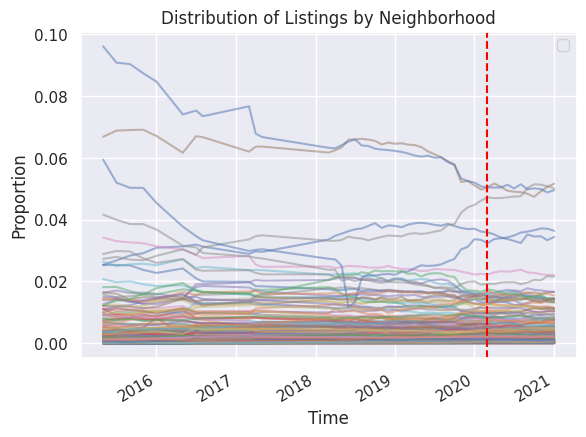

In [ ]:
# neighborhood distribution by year
airbnb.groupby(['date']).neighbourhood.value_counts(normalize=True).unstack().fillna(0).plot(alpha=0.5)
plt.axvline(x=pd.to_datetime('3-2020'), color='red', linestyle='--')
plt.title('Distribution of Listings by Neighborhood')
plt.xlabel('Time')
plt.ylabel('Proportion')
plt.legend([])
plt.show()

In [ ]:
# number of unique host and properties
airbnb.groupby('year')[['host_id', 'id']].nunique()

,host_id,id
year,,
2015,18037,26128
2016,24002,36202
2017,22637,34505
2018,37720,66924
2019,37665,72037
2020,29103,57810
2021,18549,32175


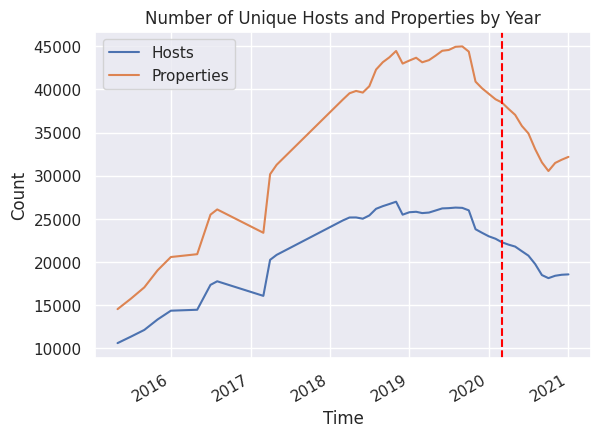

In [ ]:
airbnb.groupby('date')[['host_id', 'id']].nunique().plot()
plt.axvline(x=pd.to_datetime('3-2020'), color='red', linestyle='--')
plt.title('Number of Unique Hosts and Properties by Year')
plt.xlabel('Time')
plt.ylabel('Count')
plt.legend(['Hosts', 'Properties'])
plt.show()

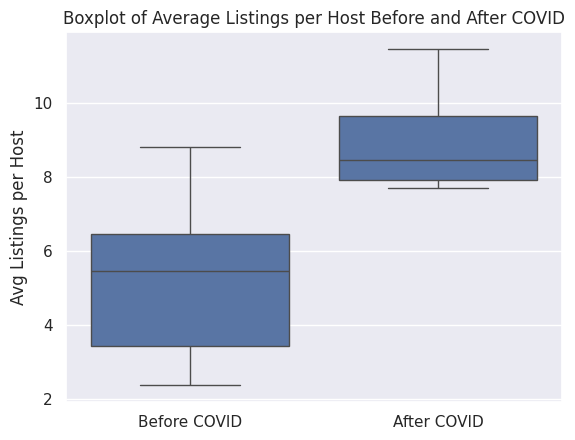

In [ ]:
# avg review_count, annual availability, host listings count
avg_airbnb = airbnb.groupby('date')[['number_of_reviews', 'availability_365', 'calculated_host_listings_count']].mean()

before_covid = avg_airbnb.index > pd.to_datetime('2020-03-01')

sns.boxplot(x=before_covid, y=avg_airbnb['calculated_host_listings_count'])
plt.title(f'Boxplot of Average Listings per Host Before and After COVID')
plt.xticks([0, 1], ['Before COVID', 'After COVID'])
plt.ylabel('Avg Listings per Host')
plt.show()

In [ ]:
listing_info = airbnb[['id', 'host_id', 'neighbourhood', 'room_type']].drop_duplicates()

In [ ]:
airbnb_clean = airbnb.groupby(['date', 'id'])[['month', 'year', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'price']].max().reset_index()
airbnb_clean = pd.merge(airbnb_clean, listing_info, on='id')
airbnb_clean

,date,id,month,year,number_of_reviews,reviews_per_month,calculated_host_listings_count,price,host_id,neighbourhood,room_type
0,2015-05-01,109,5,2015,1,0.0,1,146,521,Culver City,Entire home/apt
1,2015-05-01,147,5,2015,67,0.8,1,225,583,Venice,Entire home/apt
2,2015-05-01,2404,5,2015,0,NaN,1,85,2633,Del Rey,Shared room
3,2015-05-01,2714,5,2015,0,NaN,1,150,3017,Santa Monica,Private room
4,2015-05-01,2732,5,2015,12,0.2,2,135,3041,Santa Monica,Private room
...,...,...,...,...,...,...,...,...,...,...,...
1798538,2021-01-01,47389079,1,2021,1,1.0,1,150,299035083,Downtown,Private room
1798539,2021-01-01,47389243,1,2021,0,NaN,5,45,372613526,Arcadia,Private room
1798540,2021-01-01,47389382,1,2021,0,NaN,4,72,14936368,Mar Vista,Entire home/apt
1798541,2021-01-01,47389961,1,2021,0,NaN,5,120,372613526,Arcadia,Entire home/apt


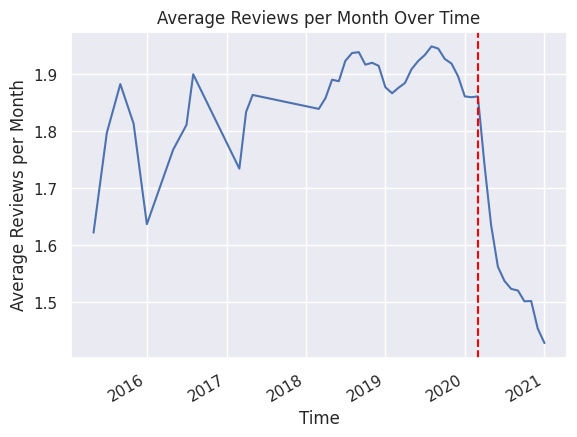

In [ ]:
airbnb_clean.groupby('date').reviews_per_month.mean().plot()
plt.axvline(x=pd.to_datetime('3-2020'), color='red', linestyle='--')
plt.title('Average Reviews per Month Over Time')
plt.xlabel('Time')
plt.ylabel('Average Reviews per Month')
plt.show()

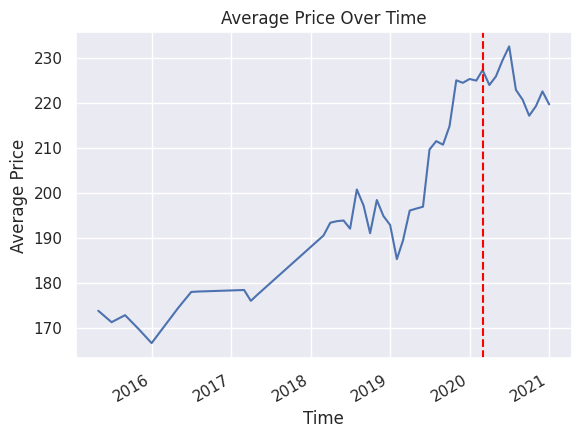

In [ ]:
airbnb_clean.groupby('date').price.mean().plot()
plt.axvline(x=pd.to_datetime('3-2020'), color='red', linestyle='--')
plt.title('Average Price Over Time')
plt.xlabel('Time')
plt.ylabel('Average Price')
plt.show()

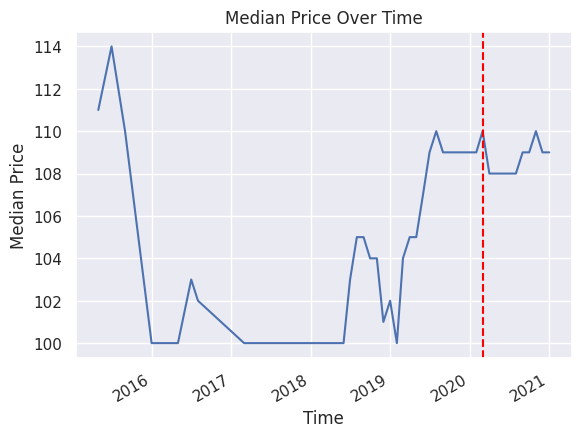

In [ ]:
airbnb_clean.groupby('date').price.median().plot()
plt.axvline(x=pd.to_datetime('3-2020'), color='red', linestyle='--')
plt.title('Median Price Over Time')
plt.xlabel('Time')
plt.ylabel('Median Price')
plt.show()

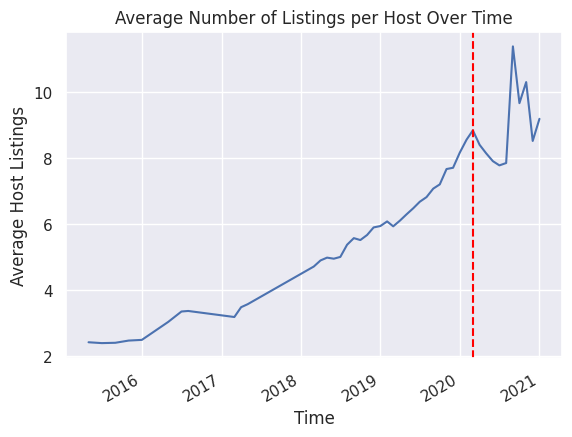

In [ ]:
airbnb_clean.groupby('date').calculated_host_listings_count.mean().plot()
plt.axvline(x=pd.to_datetime('3-2020'), color='red', linestyle='--')
plt.title('Average Number of Listings per Host Over Time')
plt.xlabel('Time')
plt.ylabel('Average Host Listings')
plt.show()

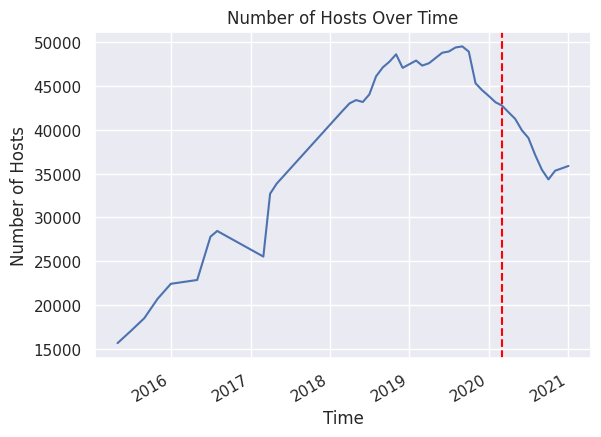

In [ ]:
airbnb_clean.groupby('date').host_id.count().plot()
plt.axvline(x=pd.to_datetime('3-2020'), color='red', linestyle='--')
plt.title('Number of Hosts Over Time')
plt.xlabel('Time')
plt.ylabel('Number of Hosts')
plt.show()

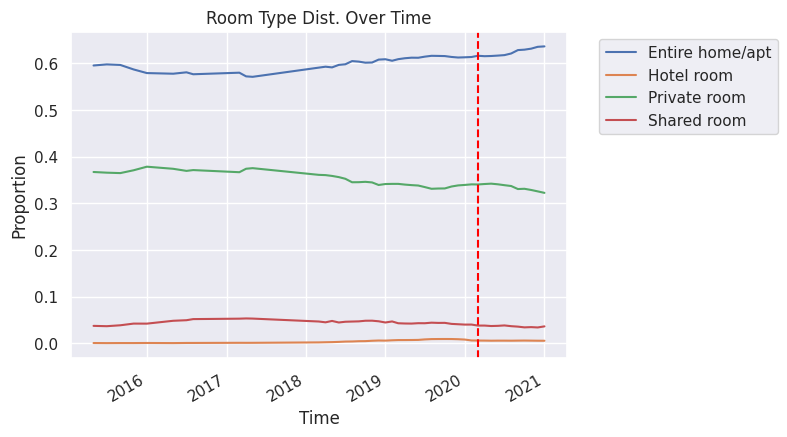

In [ ]:
room_type_prop = airbnb_clean.groupby('date').room_type.value_counts(normalize=True).unstack()
room_type_prop.plot()
plt.axvline(pd.to_datetime('3-2020'), color='red', linestyle='--')
plt.title('Room Type Dist. Over Time')
plt.xlabel('Time')
plt.ylabel('Proportion')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [ ]:
# prompt: do a statistical comparison of room_type_prop before and after covid (3-2020)

from scipy.stats import ttest_ind

# Separate data before and after March 2020
before_covid = room_type_prop.loc[:pd.to_datetime('2020-02-29')]
after_covid = room_type_prop.loc[pd.to_datetime('2020-03-01'):]

# Perform t-tests for each room type
t_test_results = {}
for room_type in room_type_prop.columns:
  t_stat, p_val = ttest_ind(after_covid[room_type], before_covid[room_type])
  t_test_results[room_type] = (t_stat, p_val)

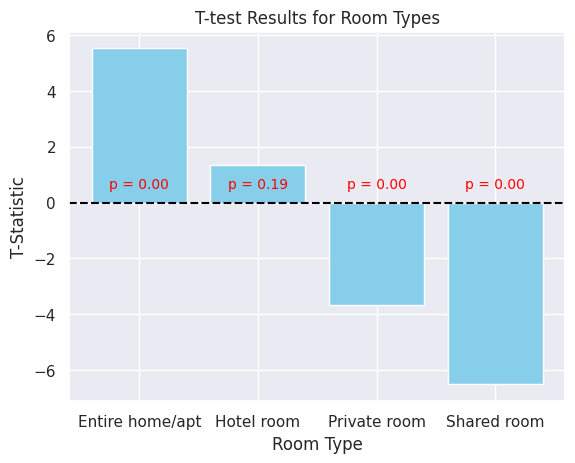

In [ ]:
room_types = list(t_test_results.keys())
t_stats = [result[0] for result in t_test_results.values()]
p_values = [result[1] for result in t_test_results.values()]

plt.bar(room_types, t_stats, color='skyblue')
plt.xlabel('Room Type')
plt.ylabel('T-Statistic')
plt.title('T-test Results for Room Types')

# Add p-values as text annotations above the bars
for i, p_value in enumerate(p_values):
    plt.text(i, 0.5, f"p = {p_value:.2f}", ha='center', color='red', size=10)
plt.axhline(0, color='black', linestyle='--')  # Add a horizontal line at t-statistic = 0
plt.show()
